| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./05_Matematica_aplicada_al_aprendizaje_automático_algebra_lineal.ipynb)| [⏩](./07_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)|

# **6. Matemáticas para el aprendizaje automático: Cálculo multivariante**

## **6.1 ¿Qué es el cálculo?**

Comprender el cálculo es fundamental para entender el aprendizaje automático Puede pensar en el cálculo simplemente como un conjunto de herramientas para analizar la relación entre las funciones y sus entradas. A menudo, en el aprendizaje automático, tratamos de encontrar las entradas que permiten a una función ajustarse mejor a los datos. Empezamos este módulo por lo básico, recordando qué es una función y dónde podemos encontrarnos con una. A continuación, hablamos de cómo, al esbozar una función en un gráfico, la pendiente describe la tasa de cambio de la salida con respecto a una entrada. Utilizando esta intuición visual, a continuación derivamos una definición matemática robusta de una derivada, que luego utilizamos para diferenciar algunas funciones interesantes. Por último, mediante el estudio de algunos ejemplos, desarrollamos cuatro prácticas reglas de ahorro de tiempo que nos permiten acelerar la diferenciación para muchos escenarios comunes.

### **6.1.1 Bienvenido al cálculo multivariante**

El **cálculo multivariante**, también conocido como cálculo de varias variables, es una extensión del cálculo de una sola variable que trata con funciones que dependen de más de una variable. Este tipo de cálculo es fundamental en muchas áreas de la ciencia y la ingeniería, como la física, economía, y biología, donde es necesario manejar y modelar fenómenos que involucran múltiples dimensiones o factores simultáneos.

**Conceptos Básicos del Cálculo Multivariante**

En cálculo multivariante, estudiamos funciones de la forma $f(x, y, z, \dots)$, donde $(f)$ es una función que depende de varias variables independientes como $(x)$, $(y)$, y $(z)$. Los conceptos fundamentales incluyen:

**Límites y Continuidad**: Similar al cálculo de una variable, pero ahora los límites se consideran en un espacio de varias dimensiones.

**Derivadas Parciales**: La derivada de una función respecto a una de sus variables, manteniendo las otras constantes.

**Gradiente**: Un vector que contiene todas las derivadas parciales de una función, que apunta en la dirección de mayor aumento de la función.

**Divergencia y Rotor**: Herramientas que permiten analizar campos vectoriales en términos de sus fuentes y vórtices.

**Integrales Múltiples**: Extienden el concepto de integración a funciones de varias variables, como dobles y triples integrales.

**Teoremas del Cálculo Multivariante**: Incluyen el Teorema de Green, el Teorema de Stokes y el Teorema de la Divergencia, que son fundamentales en física y otras ciencias.

**Ejemplo Práctico: Función de Dos Variables**

Consideremos la función $f(x, y) = x^2 + y^2$, que es una parábola en 3D.

**Gráfica de la Función**

Visualizamos esta función para entender mejor su forma:

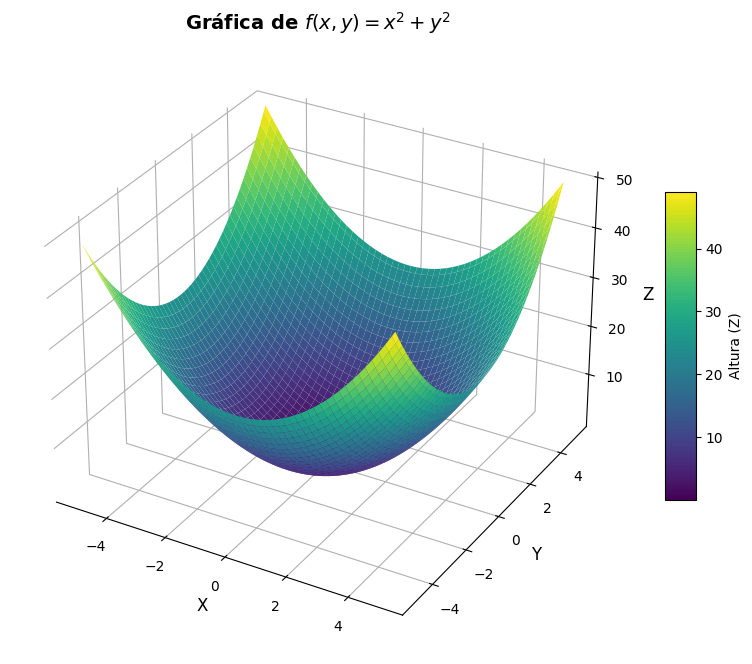

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los valores de x e y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calcular los valores de Z basados en la función dada
Z = X**2 + Y**2

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))  # Ajustar tamaño de la figura para mejor visualización
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Añadir una barra de colores que mapea los valores de Z a colores
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)  # Ajustar aspecto y tamaño de la barra de colores
cbar.set_label('Altura (Z)')

# Configuración de la visualización
plt.title('Gráfica de $f(x, y) = x^2 + y^2$', fontsize=14, fontweight='bold')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Mejorar la grilla y el fondo
ax.grid(True, linestyle='--', alpha=0.7)  # Grilla más sutil
ax.xaxis.pane.fill = False  # Quitar el fondo para mejorar la visibilidad
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')  # Mejorar la separación visual de los ejes
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

# Mostrar el gráfico
plt.show()

**Cálculo del Gradiente**

El gradiente de $(f)$ nos da la dirección de máximo incremento en cualquier punto:

$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = (2x, 2y)$

**Ejemplo de Código para Calcular el Gradiente en un Punto**

In [2]:
def gradiente(x, y):
    return np.array([2*x, 2*y])

# Calcular el gradiente en el punto (1,1)
grad_en_1_1 = gradiente(1, 1)
print("El gradiente de f en (1, 1) es:", grad_en_1_1)

El gradiente de f en (1, 1) es: [2 2]


**Aplicaciones del Cálculo Multivariante**

**Optimización**: Encontrar máximos y mínimos de funciones multivariantes es crucial en economía y en la optimización de procesos industriales.

**Dinámica de Fluidos**: Usando el rotor y la divergencia para analizar el comportamiento de los fluidos en ingeniería y meteorología.

**Teoría Electromagnética**: Los teoremas del cálculo vectorial son fundamentales para entender campos eléctricos y magnéticos.

**Geometría Diferencial y Topología**: Estudio de superficiesy curvas en 3D.

**Conclusión**

El cálculo multivariante no solo generaliza muchas ideas del cálculo de una variable a dimensiones superiores, sino que también proporciona herramientas esenciales para la ciencia y la ingeniería, permitiendo modelar y resolver problemas en entornos multivariados. La habilidad para visualizar y manipular estos conceptos matemáticamente es invaluable para profesionales y académicos en campos técnicos.

### **6.1.2 Funciones**

En matemáticas, una **función** es una relación entre dos conjuntos que asigna a cada elemento del primer conjunto exactamente un elemento del segundo conjunto. Las funciones son fundamentales en todas las áreas de las matemáticas y sus aplicaciones, incluyendo física, ingeniería, economía, y ciencias de la computación.

**Conceptos Básicos de Funciones**

**Definición Formal**

Una función $(f)$ de un conjunto $(A)$ (dominio) a un conjunto $(B)$ (codominio) se escribe como $(f: A \rightarrow B)$ y se define tal que para cada $(x)$ en $(A)$, existe exactamente un $(y)$ en $(B)$ tal que $(y = f(x))$. Aquí, $(x)$ es el "argumento" o "entrada" de la función, y $(y)$ es el "valor" o "salida".

**Tipos de Funciones**

- **Funciones Lineales**: $f(x) = mx + b$

- **Funciones Cuadráticas**: $f(x) = ax^2 + bx + c$

- **Funciones Polinomiales**: Combinaciones de términos de la forma $(a_nx^n)$

- **Funciones Trigonométricas**: $\sin(x)$, $\cos(x)$, etc.

- **Funciones Exponenciales**: $f(x) = a^x$

- **Funciones Logarítmicas**: $f(x) = \log_b(x)$

**Ejemplo Práctico: Función Lineal**

Considere la función lineal:

$f(x) = 2x + 1$

Esta es una función simple con pendiente $(2)$ y ordenada al origen $(1)$.

**Visualización de la Función Lineal**

Para visualizar esta función, podemos usar Python y Matplotlib para graficar su representación gráfica.

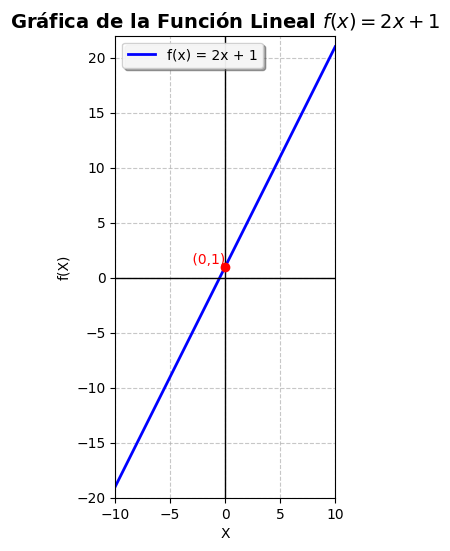

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores de x
x = np.linspace(-10, 10, 400)
y = 2 * x + 1  # Calcular y usando la función lineal

# Crear la gráfica
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='f(x) = 2x + 1', color='blue', linewidth=2)  # Ajustar color y grosor de la línea

# Añadir puntos de interés, como el punto donde la línea cruza el eje Y
ax.scatter([0], [1], color='red', zorder=5)  # Punto de intersección con el eje Y
ax.text(0, 1, ' (0,1)', verticalalignment='bottom', horizontalalignment='right', color='red')

# Configurar título y etiquetas
plt.title('Gráfica de la Función Lineal $f(x) = 2x + 1$', fontsize=14, fontweight='bold')
plt.xlabel('X')
plt.ylabel('f(X)')

# Ajustes de la grilla y los ejes
plt.axhline(0, color='black', linewidth=1)  # Hacer la línea del eje más visible
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.7)  # Grilla más sutil para mejor orientación
ax.set_aspect('equal', adjustable='box')  # Asegurar que las proporciones sean iguales

# Leyenda y estilos
plt.legend(frameon=True, framealpha=0.9, shadow=True, loc='upper left')

# Ajustar límites si es necesario para enfocar áreas de interés
ax.set_xlim([-10, 10])
ax.set_ylim([min(y) - 1, max(y) + 1])

# Mostrar el gráfico
plt.show()

**Ejemplo Práctico: Función Cuadrática**

Consideremos ahora una función cuadrática:

$f(x) = x^2 - 4x + 4$

**Visualización de la Función Cuadrática**

Esta función representa una parábola, y podemos graficarla de la siguiente manera:

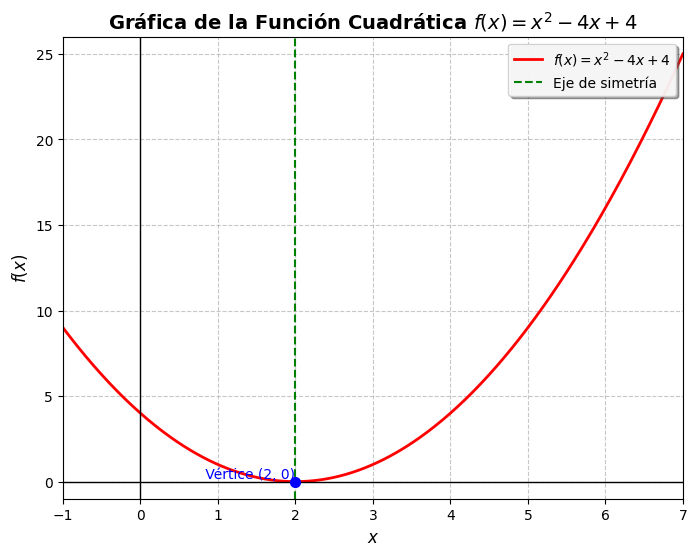

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores de x para la parábola
x = np.linspace(-1, 7, 400)
y = x**2 - 4*x + 4  # Calcular y usando la función cuadrática

# Crear la gráfica
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='$f(x) = x^2 - 4x + 4$', color='red', linewidth=2)  # Ajustar el grosor de la línea

# Añadir puntos críticos, como el vértice de la parábola
vertex_x = 2  # x-coordinate of the vertex
vertex_y = vertex_x**2 - 4*vertex_x + 4  # y-value of the vertex
ax.scatter(vertex_x, vertex_y, color='blue', s=50, zorder=5)  # Punto del vértice
ax.text(vertex_x, vertex_y, ' Vértice (2, 0)', verticalalignment='bottom', horizontalalignment='right', color='blue')

# Configuración del gráfico
ax.set_title('Gráfica de la Función Cuadrática $f(x) = x^2 - 4x + 4$', fontsize=14, fontweight='bold')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)

# Ajustes de la grilla y los ejes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('auto')

# Añadir líneas que demuestren simetría
ax.axvline(x=2, color='green', linestyle='--', label='Eje de simetría')  # Eje de simetría de la parábola

# Leyenda y estilos
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Ajustar límites si es necesario para enfocar áreas de interés
ax.set_xlim([-1, 7])
ax.set_ylim([min(y) - 1, max(y) + 1])

# Mostrar el gráfico
plt.show()

**Aplicaciones de Funciones**

Las funciones no solo son herramientas matemáticas para expresar relaciones entre variables, sino que también son esenciales en aplicaciones prácticas:

- **Modelado de Fenómenos**: En ciencias y ingeniería para modelar relaciones físicas y químicas.

- **Análisis Económico**: En economía para modelar la oferta y demanda, entre otros.

- **Computación**: Algoritmos y estructuras de datos que dependen de funciones matemáticas para procesamiento de datos y cálculo.

**Conclusión**

Entender las funciones y saber cómo manipularlas y visualizarlas es fundamental en matemáticas. Este conocimiento es crucial para estudiantes y profesionales en casi todas las disciplinas, proporcionando la base para análisis más complejos y decisiones informadas en sus respectivos campos.

### **6.1.3 Rise Over Run**

El término "rise over run" se refiere a un concepto fundamental en matemáticas, específicamente en el estudio de la geometría y el álgebra de líneas. Este concepto es la base para definir la pendiente de una línea recta en un plano cartesiano. "Rise" (subida) representa el cambio vertical entre dos puntos en la línea, mientras que "Run" (recorrido) representa el cambio horizontal entre estos mismos puntos.

**Definición de Pendiente: Rise Over Run**

La **pendiente** de una línea recta indica qué tan inclinada está la línea respecto al eje horizontal y se calcula como el cambio vertical ("rise") dividido por el cambio horizontal ("run") entre dos puntos cualesquiera en la línea. Matemáticamente, si tenemos dos puntos en la línea, $(x_1, y_1)$ y $(x_2, y_2)$, la pendiente $(m)$ se calcula como:

$m = \frac{\text{rise}}{\text{run}} = \frac{y_2 - y_1}{x_2 - x_1}$

**Ejemplo Práctico: Calculando la Pendiente**

Supongamos que queremos encontrar la pendiente de una línea que pasa por los puntos $(1, 2)$ y $(3, 8)$.

**Calculando "Rise"**: El cambio en $(y)$ es $(8 - 2 = 6)$.

**Calculando "Run"**: El cambio en $(x)$ es $(3 - 1 = 2)$.

**Pendiente ("Rise over Run")**: La pendiente es entonces $(\frac{6}{2} = 3)$.

Esto significa que por cada unidad que se mueve horizontalmente hacia la derecha (run), la línea sube verticalmente 3 unidades (rise).

**Visualización en Python**

Podemos usar Python y Matplotlib para visualizar la línea y destacar la relación "rise over run".

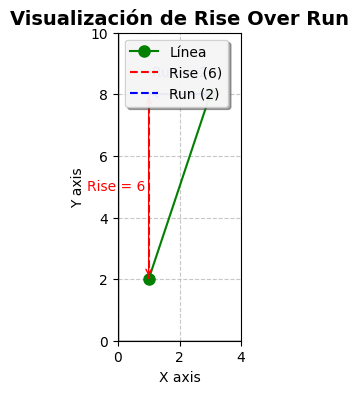

In [5]:
import matplotlib.pyplot as plt

# Definir puntos
x = [1, 3]
y = [2, 8]

# Crear gráfica
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, label='Línea', marker='o', markersize=8, linestyle='-', color='green')  # Línea principal con puntos marcados

# Dibujar el "Rise" (vertical)
ax.plot([x[0], x[0]], [y[0], y[1]], color='red', linestyle='--', label='Rise (6)')
# Dibujar el "Run" (horizontal)
ax.plot([x[0], x[1]], [y[1], y[1]], color='blue', linestyle='--', label='Run (2)')

# Añadir flechas para indicar "Rise" y "Run"
ax.annotate('', xy=(x[0], y[1]), xytext=(x[0], y[0]), arrowprops=dict(arrowstyle="<->", color='red'))
ax.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[1]), arrowprops=dict(arrowstyle="<->", color='blue'))

# Etiquetas para "Rise" y "Run"
ax.text(x[0]-0.1, (y[0] + y[1])/2, 'Rise = 6', va='center', ha='right', color='red')
ax.text((x[0] + x[1])/2, y[1]+0.5, 'Run = 2', va='bottom', ha='center', color='blue')

# Configuración de la gráfica
ax.set_title('Visualización de Rise Over Run', fontsize=14, fontweight='bold')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_xlim(0, 4)
ax.set_ylim(0, 10)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('equal')  # Asegura que 1 unidad en X es igual a 1 unidad en Y

# Añadir leyenda
ax.legend(loc='upper left', frameon=True, framealpha=0.9, shadow=True)

# Mostrar el gráfico
plt.show()

Este código creará una gráfica que muestra claramente cómo la línea se mueve entre los dos puntos, destacando tanto el "rise" como el "run", y cómo estos se combinan para formar la pendiente de la línea.

**Aplicaciones de "Rise Over Run"**

El concepto de "rise over run" se utiliza ampliamente en:

- **Matemáticas y Física**: Para calcular pendientes en gráficos de movimiento, tasas de cambio, y más.

- **Ingeniería**: Diseño de caminos y puentes donde la pendiente es crítica para la seguridad y funcionalidad.

- **Navegación y Cartografía**: Mapas topográficos donde las pendientes determinan las rutas más fáciles o más difíciles.

**Conclusión**

"Rise over run" es un concepto esencial para entender cómo las variables relacionadas cambian entre sí dentro de un contexto geométrico. Proporciona una base para el cálculo diferencial y el análisis gráfico en muchas disciplinas científicas y técnicas. Su visualización y comprensión son cruciales para estudiantes y profesionales en muchos campos que requieren un análisis preciso de las relaciones lineales.

### **6.1.4 Definición de un derivado**

La **definición de un derivado** es uno de los conceptos más fundamentales en el cálculo diferencial, formando la base para entender cómo cambian las funciones. Un derivado representa la tasa de cambio instantánea de una función con respecto a una de sus variables independientes.

**Concepto Básico de un Derivado**

La derivada de una función en un punto específico es el límite de la razón de cambio promedio de la función en ese punto a medida que el intervalo de cambio se acerca a cero. Esto es, esencialmente, la pendiente de la tangente a la curva de la función en ese punto.

**Definición Matemática**

Si $(f)$ es una función y $(x)$ es un punto en el dominio de $(f)$, la derivada de $(f)$ en $(x)$, denotada como $f'(x)$ o $(\frac{df}{dx}(x))$, se define como:

$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

donde:

- $(h)$ es un incremento pequeño en $(x)$.

- $f(x+h)$ es el valor de la función en $(x + h)$.

- $\frac{f(x+h) - f(x)}{h}$ es la tasa promedio de cambio de $(f)$ sobre el intervalo $[x, x+h]$.

**Ejemplo Práctico: Derivada de una Función Lineal**

Consideremos la función lineal $f(x) = 3x + 2$.

**Cálculo de la Derivada**

Aplicando la definición de derivada:

$f'(x) = \lim_{h \to 0} \frac{(3(x+h) + 2) - (3x + 2)}{h} = \lim_{h \to 0} \frac{3x + 3h + 2 - 3x - 2}{h} = \lim_{h \to 0} \frac{3h}{h} = 3$

Este resultado muestra que la tasa de cambio de la función $f(x) = 3x + 2$ es constante e igual a 3 en todos los puntos $(x)$.

**Visualización en Python**

Podemos usar Python para visualizar la función y su tangente (derivada) en un punto específico.

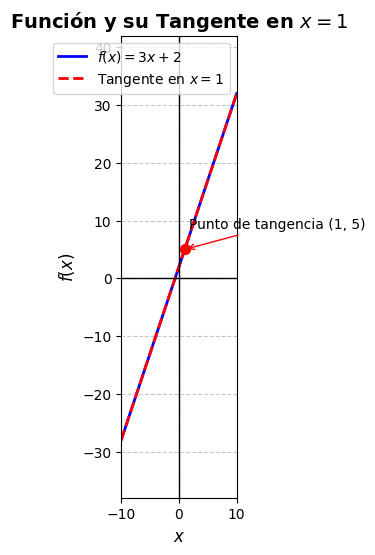

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y su derivada
def f(x):
    return 3*x + 2

def df(x):
    return 3  # Derivada constante para la función lineal

# Puntos para la función
x = np.linspace(-10, 10, 400)
y = f(x)

# Punto para tangente
x_tan = 1
y_tan = f(x_tan)
slope = df(x_tan)

# Puntos para la línea tangente
tangent_line = slope * (x - x_tan) + y_tan

# Crear gráfica
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='$f(x) = 3x + 2$', color='blue', linewidth=2)
ax.plot(x, tangent_line, label='Tangente en $x=1$', color='red', linestyle='--', linewidth=2)
ax.scatter([x_tan], [y_tan], color='red', s=50, zorder=5)  # Punto de tangencia destacado

# Añadir anotaciones para mejorar la comprensión
ax.annotate('Punto de tangencia (1, 5)', xy=(x_tan, y_tan), xytext=(x_tan + 2, y_tan + 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

# Configuración de la gráfica
ax.set_title('Función y su Tangente en $x=1$', fontsize=14, fontweight='bold')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('equal')  # Asegurar que las proporciones sean iguales para visualizar correctamente las pendientes
ax.legend()

# Ajustar límites si es necesario para enfocar áreas de interés
ax.set_xlim([-10, 10])
ax.set_ylim([min(y) - 10, max(y) + 10])

# Mostrar el gráfico
plt.show()

**Aplicaciones de la Derivada**

**Optimización**: Las derivadas son usadas para encontrar puntos donde una función alcanza sus valores máximos y mínimos locales.

**Ciencias Físicas**: En física, las derivadas representan velocidades, aceleraciones y otras tasas de cambio.

**Economía**: Las derivadas ayudan a modelar costos, ingresos, y otras funciones económicas para optimizar ganancias y otros indicadores.

**Conclusión**

La derivada es una herramienta increíblemente poderosa en matemáticas que permite no solo entender el comportamiento instantáneo de las funciones sino también aplicar este entendimiento en una amplia gama de contextos prácticos. Su estudio es esencial para campos que requieren modelado preciso de cambios y ajustes basados en condiciones variables.

### **6.1.5 Ejemplos de diferenciación y casos especiales**

La diferenciación es una técnica fundamental en cálculo que se utiliza para calcular la derivada de una función. La derivada describe cómo cambia el valor de una función en relación con un cambio en sus variables de entrada. En esta respuesta, exploraremos algunos ejemplos comunes de diferenciación, incluyendo casos especiales que requieren técnicas adicionales como la regla de la cadena, la regla del producto y la regla del cociente.

**Ejemplos Básicos de Diferenciación**

**Función Polinomial**

Consideremos la función $f(x) = x^2 + 3x + 2$.

**Derivada:**

Para diferenciar esta función, aplicamos la regla de poder, que dice que la derivada de $(x^n)$ es $(nx^{n-1})$.

$f'(x) = 2x + 3$

**Código Python y Gráfica:**

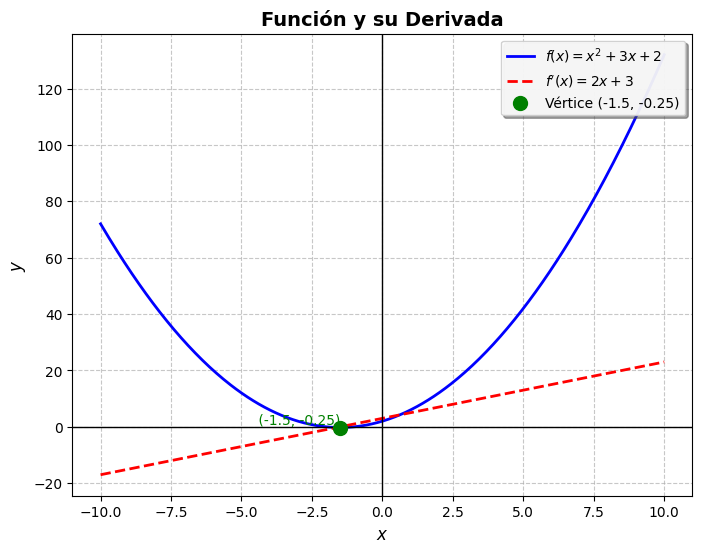

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 3*x + 2

def df(x):
    return 2*x + 3

x = np.linspace(-10, 10, 400)
y = f(x)
dy = df(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='$f(x) = x^2 + 3x + 2$', color='blue', linewidth=2)  # Línea más gruesa para la función
ax.plot(x, dy, label="$f'(x) = 2x + 3$", color='red', linestyle='--', linewidth=2)  # Línea más gruesa para la derivada

# Destacar el vértice de la parábola
vertex_x = -3/2  # Derivada igual a cero para hallar el vértice
vertex_y = f(vertex_x)
ax.scatter(vertex_x, vertex_y, color='green', s=100, label='Vértice (-1.5, -0.25)', zorder=5)
ax.text(vertex_x, vertex_y, ' (-1.5, -0.25)', verticalalignment='bottom', horizontalalignment='right', color='green')

# Configuración del gráfico
ax.set_title('Función y su Derivada', fontsize=14, fontweight='bold')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.axhline(0, color='black', linewidth=1)  # Línea del eje más visible
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)  # Grilla más sutil
ax.set_aspect('auto')
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Mostrar el gráfico
plt.show()

**Función Trigonométrica**

Consideremos la función $g(x) = \sin(x)$.

**Derivada:**

La derivada del seno de $(x)$ es el coseno de $(x)$:

$g'(x) = \cos(x)$

**Código Python y Gráfica:**

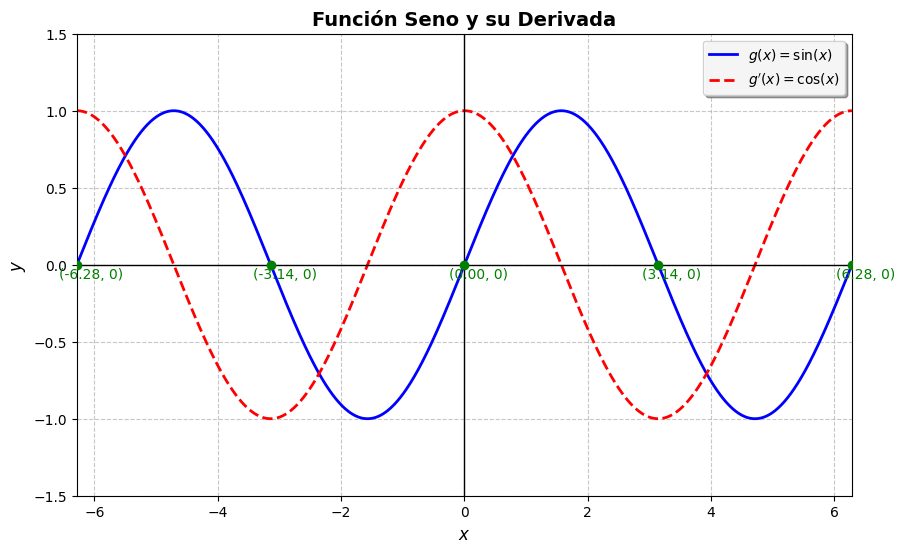

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores de x e y
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = np.sin(x)
dy = np.cos(x)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))  # Tamaño más grande para mejor visualización
ax.plot(x, y, label='$g(x) = \sin(x)$', color='blue', linewidth=2)  # Línea más gruesa para la función seno
ax.plot(x, dy, label="$g'(x) = \cos(x)$", color='red', linestyle='--', linewidth=2)  # Línea más gruesa para la derivada coseno

# Resaltar los puntos donde la función cruza el eje x
zeros = np.arange(-2*np.pi, 2*np.pi+1, np.pi)
ax.scatter(zeros, np.sin(zeros), color='green', zorder=5)  # Puntos de cruce con el eje x
for z in zeros:
    ax.annotate(f'({z:.2f}, 0)', xy=(z, 0), xytext=(10, -10),
                 textcoords='offset points', ha='center', color='green')

# Configuración del gráfico
ax.set_title('Función Seno y su Derivada', fontsize=14, fontweight='bold')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.axhline(0, color='black', linewidth=1)  # Línea del eje más visible
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('auto')  # Ajustar aspecto según sea necesario
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Ajustar el rango del eje x para mostrar múltiples ciclos de la función
ax.set_xlim([-2*np.pi, 2*np.pi])
ax.set_ylim([-1.5, 1.5])

# Mostrar el gráfico
plt.show()

**Casos Especiales de Diferenciación**

**Regla del Producto**

**Función:**

$h(x) = x^2 \sin(x)$

**Derivada usando la regla del producto:**

Si $u(x) = x^2$ y $v(x) = \sin(x)$, entonces

$h'(x) = u'(x) v(x) + u(x) v'(x) = 2x \sin(x) + x^2 \cos(x)$

**Regla del Cociente**

**Función:**

$j(x) = \frac{x^2}{\sin(x)}$ asumiendo $x \neq n\pi$ donde $(n)$ es entero para evitar división por cero

**Derivada usando la regla del cociente:**

$j'(x) = \frac{2x \sin(x) - x^2 \cos(x)}{\sin^2(x)}$

**Regla de la Cadena**

**Función:**

$k(x) = \sin(x^2)$

**Derivada usando la regla de la cadena:**

Si $u(x) = x^2$ y $v(u) = \sin(u)$, entonces

$k'(x) = \cos(x^2) \cdot 2x$

**Código Python para Visualización de la Regla de la Cadena**

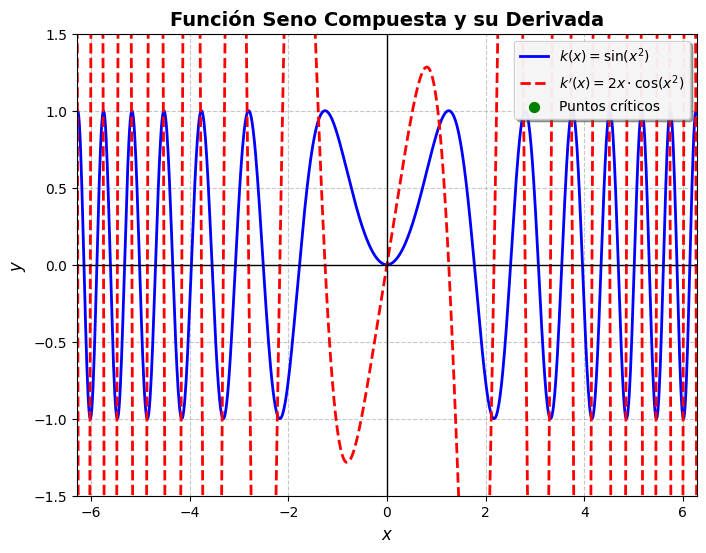

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def k(x):
    return np.sin(x**2)

def dk(x):
    return 2*x*np.cos(x**2)

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = k(x)
dy= dk(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='$k(x) = \sin(x^2)$', color='blue', linewidth=2)  # Línea más gruesa para mejor visibilidad
ax.plot(x, dy, label="$k'(x) = 2x \cdot \cos(x^2)$", color='red', linestyle='--', linewidth=2)  # Línea más gruesa para la derivada

# Resaltar los puntos críticos de la derivada
critical_points_x = x[dk(x) == 0]
critical_points_y = k(critical_points_x)
ax.scatter(critical_points_x, critical_points_y, color='green', s=50, zorder=5, label='Puntos críticos')

# Configuración del gráfico
ax.set_title('Función Seno Compuesta y su Derivada', fontsize=14, fontweight='bold')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.axhline(0, color='black', linewidth=1)  # Línea del eje más visible
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('auto')  # Ajustar aspecto según sea necesario
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Ajustar el rango del eje x y y para mostrar múltiples ciclos de la función
ax.set_xlim([-2*np.pi, 2*np.pi])
ax.set_ylim([-1.5, 1.5])

# Mostrar el gráfico
plt.show()

**Conclusión**

La diferenciación es una herramienta esencial en cálculo para analizar cómo cambian las funciones en respuesta a cambios en sus entradas. Conocer las reglas de diferenciación y cómo aplicarlas correctamente permite resolver una amplia gama de problemas prácticos en ciencias e ingeniería. La visualización de estas funciones y sus derivadas ayuda a una mejor comprensión y análisis de sus comportamientos.

### **6.1.6 Regla del producto**

La **Regla del Producto** es una técnica fundamental en cálculo diferencial utilizada para encontrar la derivada de un producto de dos o más funciones. Es especialmente útil cuando se manejan funciones más complejas cuyos componentes son productos de otras funciones más simples.

**Definición de la Regla del Producto**

Si tienes dos funciones diferenciables, $f(x)$ y $g(x)$, la regla del producto establece que la derivada de su producto $h(x) = f(x)g(x)$ está dada por:

$h'(x) = f'(x)g(x) + f(x)g'(x)$

Esta fórmula se puede extender para el producto de más de dos funciones, aplicando repetidamente la regla del producto.

**Ejemplo Práctico con Aplicación de la Regla del Producto**

**Función**

Consideremos las funciones $f(x) = x^2$ y $g(x) = \cos(x)$. Queremos derivar su producto $h(x) = x^2 \cos(x)$.

**Cálculo de Derivadas:**

$f(x) = x^2$ entonces $f'(x) = 2x$

$g(x) = \cos(x)$ entonces $g'(x) = -\sin(x)$

**Aplicando la Regla del Producto:**

$h'(x) = f'(x)g(x) + f(x)g'(x) = 2x \cos(x) + x^2 (-\sin(x)) = 2x \cos(x) - x^2 \sin(x)$

**Visualización en Python**

Podemos usar Python para visualizar la función original $h(x) = x^2 \cos(x)$ y su derivada.

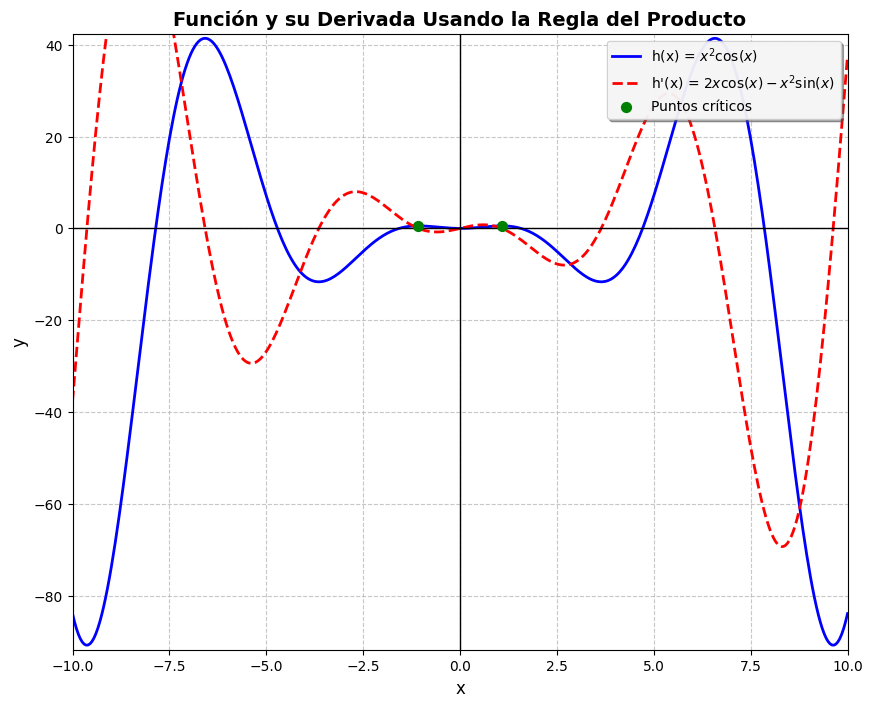

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones
def f(x):
    return x**2

def g(x):
    return np.cos(x)

def h(x):
    return f(x) * g(x)

def h_prime(x):
    return 2*x*np.cos(x) - x**2*np.sin(x)

# Valores para x
x = np.linspace(-10, 10, 400)

# Crear gráficos
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, h(x), label='h(x) = $x^2 \cos(x)$', color='blue', linewidth=2)  # Línea más gruesa para la función
ax.plot(x, h_prime(x), label="h'(x) = $2x \cos(x) - x^2 \sin(x)$", color='red', linestyle='--', linewidth=2)  # Línea más gruesa para la derivada

# Resaltar puntos críticos (opcional)
critical_points_x = x[np.abs(h_prime(x)) < 0.01]  # Encuentra x donde la derivada está cerca de 0
critical_points_y = h(critical_points_x)
ax.scatter(critical_points_x, critical_points_y, color='green', s=50, zorder=5, label='Puntos críticos')

# Configuración del gráfico
ax.set_title('Función y su Derivada Usando la Regla del Producto', fontsize=14, fontweight='bold')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.axhline(0, color='black', linewidth=1)  # Líneas de eje más visibles
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim([-10, 10])
ax.set_ylim([min(h(x))-1, max(h(x))+1])
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Mostrar el gráfico
plt.show()

**Aplicaciones de la Regla del Producto**

La regla del producto es ampliamente utilizada en varias disciplinas, incluyendo:

- **Física**: Para derivar ecuaciones de movimiento donde las variables están multiplicadas (por ejemplo, energía potencial como el producto de masa, gravedad y altura).

- **Ingeniería**: En el análisis de circuitos y en la mecánica de materiales, donde los productos de funciones aparecen con frecuencia.

- **Economía**: Para derivar funciones de costos, beneficios o producción que dependen de múltiples factores multiplicativos.

**Conclusión**

Entender y aplicar correctamente la regla del producto es crucial para manejar situaciones complejas en cálculo diferencial donde las funciones están multiplicadas entre sí. Esta habilidad mejora la eficiencia y precisión en el análisis matemático y ayuda a resolver problemas prácticos en ciencia e ingeniería. La visualización de estas funciones y sus derivadas facilita una mejor comprensión de su comportamiento y variaciones.

### **6.1.7 Regla de la cadena**

La **Regla de la Cadena** es una técnica esencial en cálculo diferencial que se utiliza para calcular la derivada de una función compuesta. Es decir, permite encontrar la tasa de cambio de funciones que son el resultado de aplicar una función a otra. Esta herramienta es crucial para manejar funciones más complejas que involucran composiciones de múltiples funciones.

**Definición de la Regla de la Cadena**

Supongamos que tenemos dos funciones $(f)$ y $(g)$, donde $(f)$ es aplicada a $(g)$. Si deseamos encontrar la derivada de la composición de $(f)$ con $(g)$, que escribimos como $h(x) = f(g(x))$, la Regla de la Cadena establece que:

$h'(x) = f'(g(x)) \cdot g'(x)$

Esto significa que la derivada de $(h)$ en $(x)$ es el producto de la derivada de $(f)$ evaluada en $g(x)$ y la derivada de $(g)$ en $(x)$.

**Ejemplo Práctico**

**Función Compuesta**

Consideremos las funciones $f(u) = \sin(u)$ y $g(x) = x^2$. La función compuesta será $h(x) = \sin(x^2)$.

**Cálculo de Derivadas:**

1. $f(u) = \sin(u)$ entonces $f'(u) = \cos(u)$

2. $g(x) = x^2$ entonces $g'(x) = 2x$

**Aplicando la Regla de la Cadena:**

$h'(x) = f'(g(x)) \cdot g'(x) = \cos(x^2) \cdot 2x = 2x \cos(x^2)$

**Visualización en Python**

Podemos visualizar la función $h(x) = \sin(x^2)$ y su derivada usando Python:

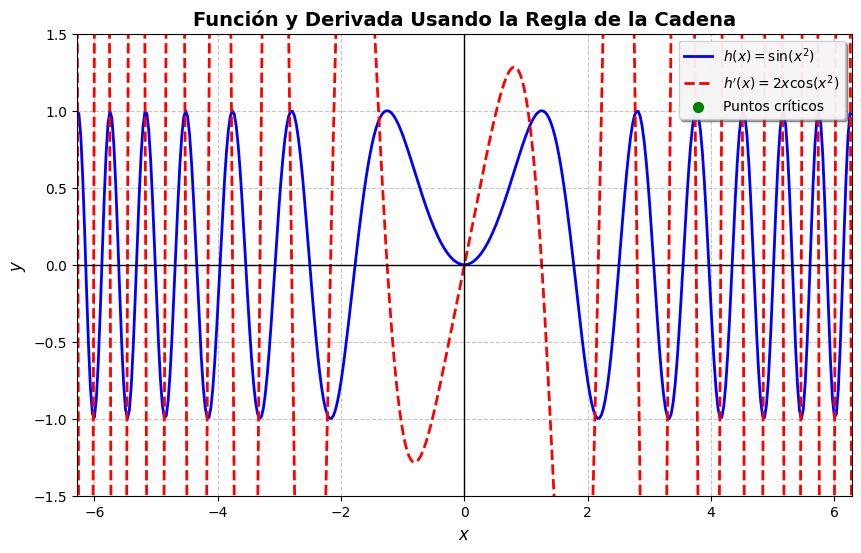

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función h(x) y su derivada
def h(x):
    return np.sin(x**2)

def h_prime(x):
    return 2 * x * np.cos(x**2)

# Rango de valores de x para graficar
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = h(x)
dy = h_prime(x)

# Crear gráficos
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='$h(x) = \sin(x^2)$', color='blue', linewidth=2)
ax.plot(x, dy, label="$h'(x) = 2x \cos(x^2)$", color='red', linestyle='--', linewidth=2)

# Resaltar los puntos críticos donde la derivada es cero
critical_points_x = x[np.isclose(dy, 0, atol=1e-2)]
critical_points_y = h(critical_points_x)
ax.scatter(critical_points_x, critical_points_y, color='green', s=50, zorder=5, label='Puntos críticos')

# Configuración de la gráfica
ax.set_title('Función y Derivada Usando la Regla de la Cadena', fontsize=14, fontweight='bold')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('auto')
ax.set_xlim([-2*np.pi, 2*np.pi])
ax.set_ylim([-1.5, 1.5])
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Mostrar el gráfico
plt.show()

**Aplicaciones de la Regla de la Cadena**

La Regla de la Cadena tiene numerosas aplicaciones en diferentes campos científicos y de ingeniería, como:

1. **Física**: En la mecánica y la termodinámica, donde las variables dependientes son funciones compuestas, como la velocidad en trayectorias curvas.

2. **Economía**: En la modelización de la elasticidad de la demanda respecto a precios que cambian en función de otras variables.

3. **Biología**: En la modelación de tasas de cambio en reacciones químicas que dependen de múltiples factores.

4. **Medicina**: En el análisis de la respuesta del cuerpo a medicamentos cuya absorción varía en el tiempo.

**Conclusión**

La Regla de la Cadena es una herramienta poderosa que simplifica el cálculo de derivadas de funciones compuestas. Entender cómo aplicar correctamente esta regla es fundamental para estudiantes y profesionales que trabajan con matemáticas aplicadas, proporcionando una base sólida para el análisis avanzado en múltiples disciplinas.

### **6.1.8 Taming a beast**

**Concepto de "Taming a Beast" en Matemáticas**

En el contexto matemático, "domar una bestia" podría referirse al proceso de encontrar raíces de un polinomio complicado utilizando métodos numéricos y analíticos.

**Ejemplo: Raíces de un Polinomio**

Considere el polinomio de cuarto grado:

$p(x) = x^4 - 4x^3 + 6x^2 - 4x + 1$

Este es un polinomio con coeficientes enteros cuyas raíces no son fácilmente calculables a mano. Para "domar" este problema, podemos usar métodos numéricos.

**Visualización y Cálculo en Python**

Podemos usar Python para visualizar el polinomio y calcular sus raíces utilizando la biblioteca NumPy, específicamente la función `numpy.roots`.

In [12]:
import numpy as np

# Coeficientes del polinomio
coefficients = [1, -4, 6, -4, 1]

# Calcular raíces
roots = np.roots(coefficients)

# Imprimir las raíces para verificar si son complejas
print("Raíces del polinomio:", roots)

# Verificar si alguna de las raíces es compleja
if np.any(np.iscomplex(roots)):
    print("Algunas raíces son complejas.")
else:
    print("Todas las raíces son reales.")

Raíces del polinomio: [1.00021915+0.j         0.99999998+0.00021913j 0.99999998-0.00021913j
 0.99978088+0.j        ]
Algunas raíces son complejas.


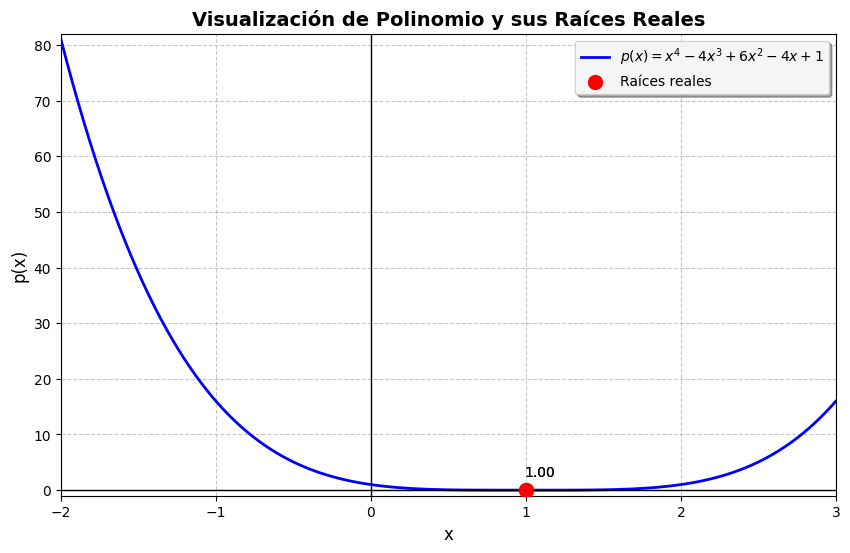

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Función para evaluar el polinomio
def poly(x):
    return x**4 - 4*x**3 + 6*x**2 - 4*x + 1

# Encontrar raíces del polinomio usando Numpy
coefficients = [1, -4, 6, -4, 1]  # Coeficientes del polinomio
roots = np.roots(coefficients)  # Calcula las raíces del polinomio

# Filtrar solo las raíces reales
real_roots = roots[np.isreal(roots)].real

# Rango de valores x para la visualización
x = np.linspace(-2, 3, 400)
y = poly(x)

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='$p(x) = x^4 - 4x^3 + 6x^2 - 4x + 1$', color='blue', linewidth=2)
ax.scatter(real_roots, poly(real_roots), color='red', s=100, zorder=5, label='Raíces reales')  # Resaltar las raíces reales

# Anotar las raíces reales
for root in real_roots:
    ax.annotate(f'{root:.2f}', xy=(root, poly(root)), xytext=(10, 10),
                textcoords='offset points', ha='center', color='black')

# Configuración del gráfico
ax.set_title('Visualización de Polinomio y sus Raíces Reales', fontsize=14, fontweight='bold')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('p(x)', fontsize=12)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim([-2, 3])
ax.set_ylim([np.min(y) - 1, np.max(y) + 1])
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Mostrar el gráfico
plt.show()

Este código no solo encuentra las raíces del polinomio, sino que también proporciona una representación gráfica del polinomio y destaca sus raíces, ayudando a "domar" la complejidad del problema.

**Aplicaciones Generales**

El concepto de "domar una bestia" puede aplicarse en varios contextos:

**Sistemas Dinámicos y Caos**: Simplificando modelos complejos mediante aproximaciones y simulaciones numéricas.

**Optimización de Algoritmos**: Reduciendo la complejidad computacional de algoritmos para grandes conjuntos de datos.

**Física Teórica**: Resolviendo ecuaciones complicadas en teorías físicas avanzadas usando métodos aproximados y simulaciones.

**Conclusión**

"Taming a beast" en un contexto matemático y científico generalmente se refiere a hacer un problema complejo más manejable mediante la aplicación de métodos sistemáticos y herramientas avanzadas. Esto no solo incluye encontrar soluciones a ecuaciones difíciles, sino también simplificar la forma en que se abordan y se entienden los problemas complejos en la ciencia y la ingeniería.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./05_Matematica_aplicada_al_aprendizaje_automático_algebra_lineal.ipynb)| [⏩](./07_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)|